In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
with open('/home/XXX/CodeSemantic/CodeSemantic/Results/block_results_10.json') as f:
    data = json.load(f)


data_list = []
for model_name, model_data in data.items():
    for lang, lang_data in model_data['pt0'].items():
        for block_size, block_data in lang_data['block_results'].items():
            data_list.append({
                'Model': model_name,
                'Language': lang,
                'Block Size': int(block_size),  # Convert to integer
                'Accuracy': block_data['accuracy']
            })


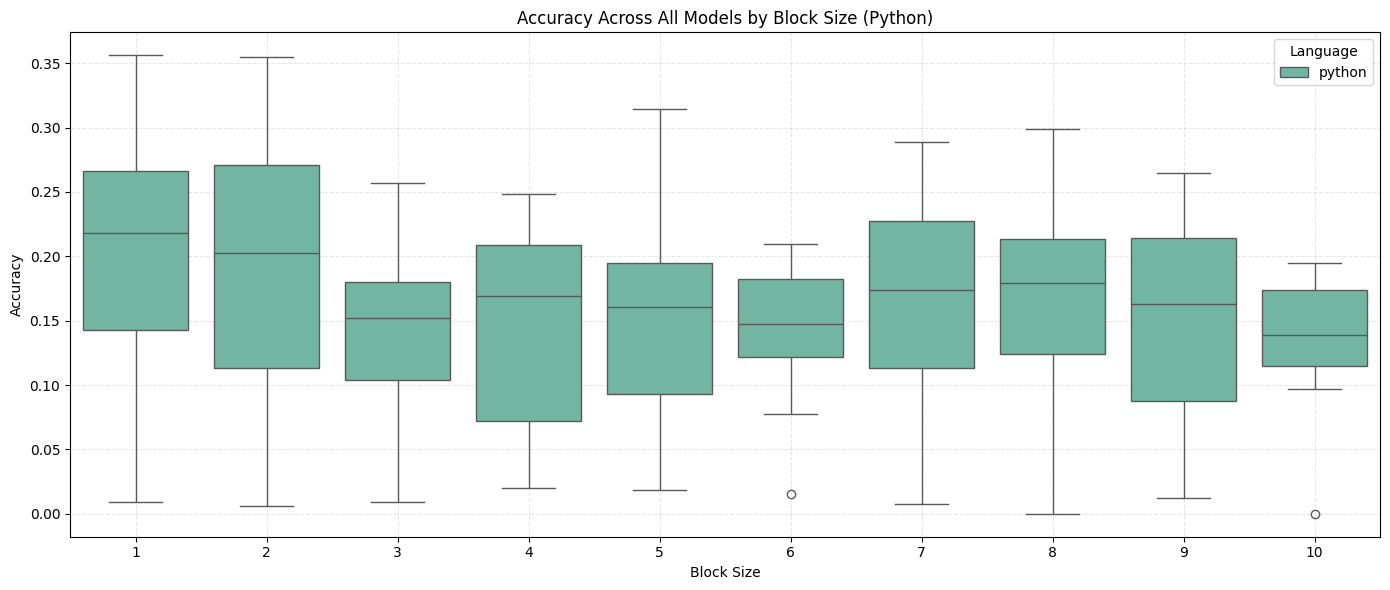

In [3]:
df = pd.DataFrame(data_list)
df = df.sort_values('Block Size')

df_python = df[df['Language']== 'python']

# Create plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Block Size', 
    y='Accuracy', 
    hue='Language', 
    data=df_python, 
    palette="Set2",
    order=sorted(df_python['Block Size'].unique()) 
)
plt.title("Accuracy Across All Models by Block Size (Python)")
plt.legend(title='Language')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()
